In [1]:
# native
import pandas as pd 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# constants
LS_WV = [
    # https://cdn.sparkfun.com/assets/8/5/f/0/3/AS7265x_Design_Considerations.pdf
    410, 435, 460, 485, 510,
    535, 560, 585, 610, 645,
    680, 705, 730, 760, 810,
    860, 900, 940
]
LS_WV = [str(x) for x in LS_WV]
COLS = ["id", "ndf", "ndfq50", "is_kfarm", "season", "pasture", "PC1", "PC2"]

In [2]:
data = pd.read_csv("spectral.csv"); data.head()

,id,ndf,ndfq50,is_kfarm,season,pasture,PC1,PC2,410,435,...,645,680,705,730,760,810,860,900,940,lidar
0,0,34.9552,False,True,MayJun,Moderate,0.031493,0.127573,570.006000,647.484000,...,525.381000,1133.298000,735.342000,749.411000,671.498000,2931.260,3155.453000,3677.037000,3685.239000,37.100000
1,1,43.5450,False,True,MayJun,Good,1.259880,-0.586282,803.893000,877.844000,...,678.856000,1946.628000,1147.397000,747.908000,650.693000,4571.541,5614.555000,6592.979000,6640.264000,49.800000
2,2,60.1546,True,True,MayJun,Good,-1.003597,0.079748,364.382727,413.844545,...,374.538182,801.054546,453.595455,455.204545,469.780909,1959.120,2212.176364,2540.531818,2720.295455,40.727273
3,3,41.5438,False,True,MayJun,Poor,0.760041,-0.552493,739.437000,750.909000,...,596.388000,1751.527000,938.788000,594.413000,599.648000,3967.791,5109.403000,6061.576000,6256.911000,48.000000
4,4,44.7612,False,False,MayJun,Poor,1.410093,-0.732798,914.458000,961.933000,...,660.130000,2049.604000,1374.399000,721.997000,628.067000,4895.498,5780.298000,6852.340000,6316.058000,39.200000


In [3]:
data_long = pd.melt(data,
    id_vars=COLS, 
    value_vars=LS_WV,
    var_name="wv", value_name="value")
data_long.head()

,id,ndf,ndfq50,is_kfarm,season,pasture,PC1,PC2,wv,value
0,0,34.9552,False,True,MayJun,Moderate,0.031493,0.127573,410,570.006000
1,1,43.5450,False,True,MayJun,Good,1.259880,-0.586282,410,803.893000
2,2,60.1546,True,True,MayJun,Good,-1.003597,0.079748,410,364.382727
3,3,41.5438,False,True,MayJun,Poor,0.760041,-0.552493,410,739.437000
4,4,44.7612,False,False,MayJun,Poor,1.410093,-0.732798,410,914.458000


In [4]:
sns.set(style="whitegrid")

### Correlation between spectral features and the target variable

Text(47.25, 0.5, 'Wavelength (nm)')

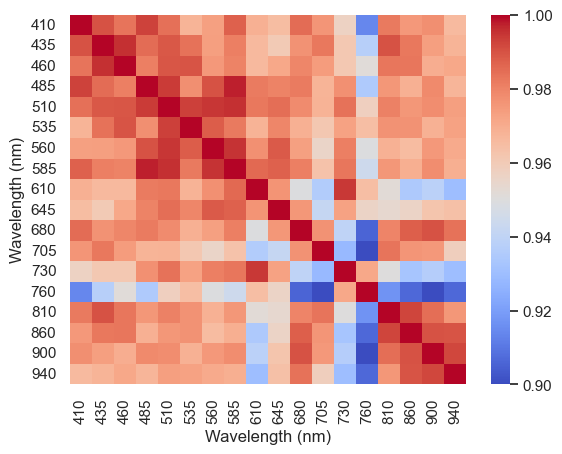

In [5]:
spec_cor = data.loc[:, LS_WV + ["ndf"]].corr()
sns.heatmap(spec_cor.iloc[:-1, :-1], cmap='coolwarm', 
            center=0.95, vmin=0.9, vmax=1)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Wavelength (nm)")

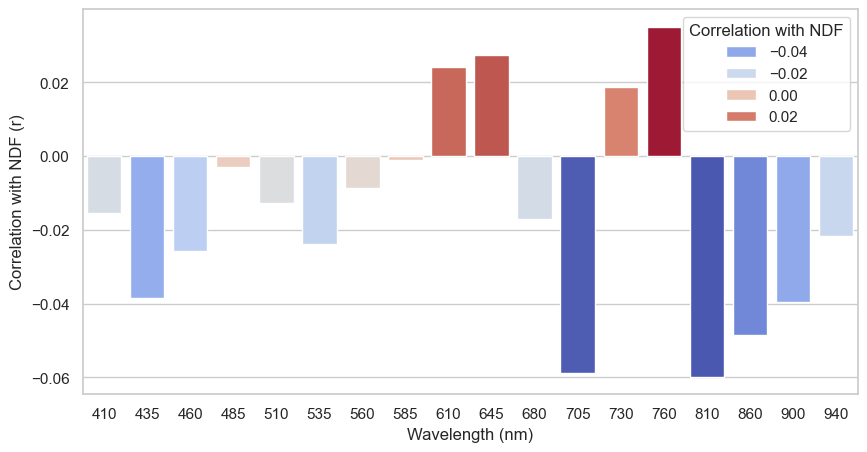

In [10]:
cor_wv = spec_cor.iloc[-1][:-1].reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=cor_wv, 
            x="index", y="ndf",
            hue="ndf",
            palette='coolwarm')
plt.ylabel("Correlation with NDF (r)")
plt.xlabel("Wavelength (nm)")
plt.legend(title="Correlation with NDF")

Text(0.5, 0, 'PC1 (97.12% variance of 18 wavelengths)')

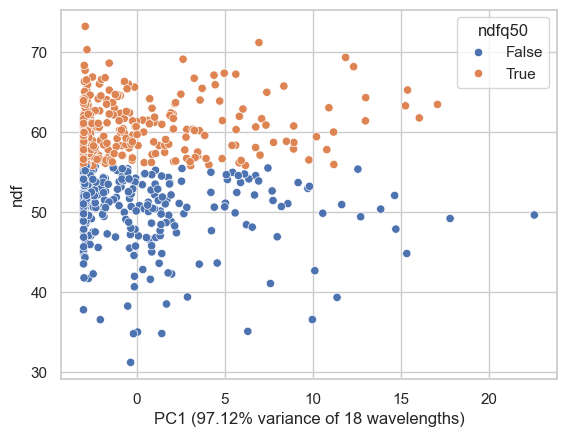

In [11]:
sns.scatterplot(data=data, x="PC1", y="ndf", hue="ndfq50") # 97.12% variance
plt.xlabel("PC1 (97.12% variance of 18 wavelengths)")

### Block effects (pasture coverage) on the target variable (NDF)

In [ ]:
# plotting parameters
params_facet = {"aspect": 1.5, "height": 4}
params_hist = {"kde": True, "binwidth": 2}
order_pasture = ["Poor", "Moderate", "Good"]

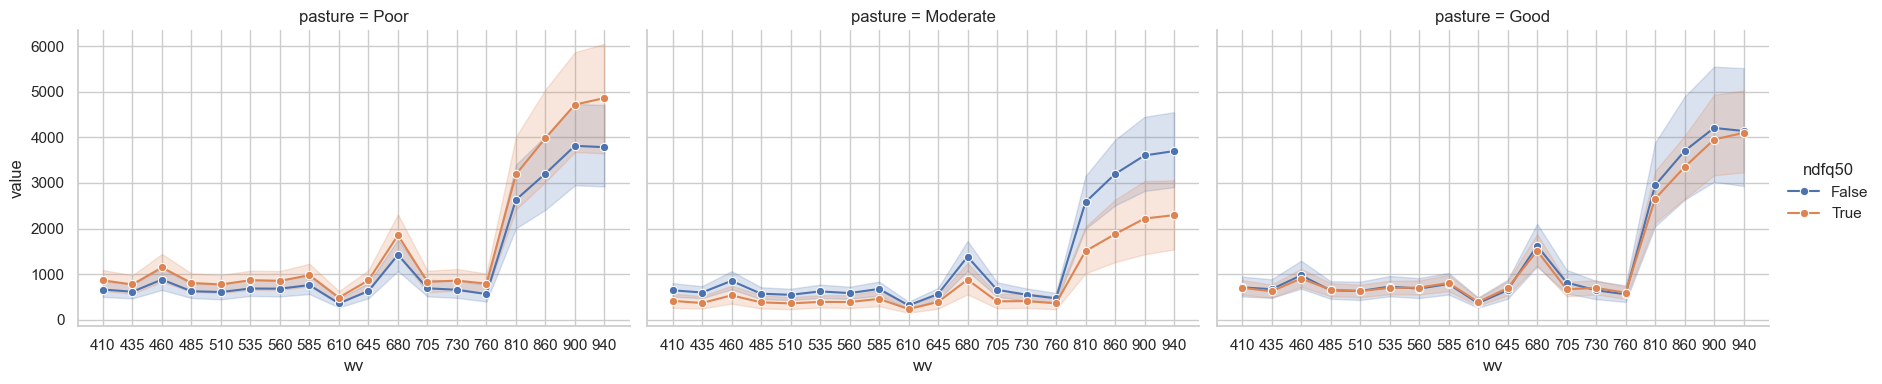

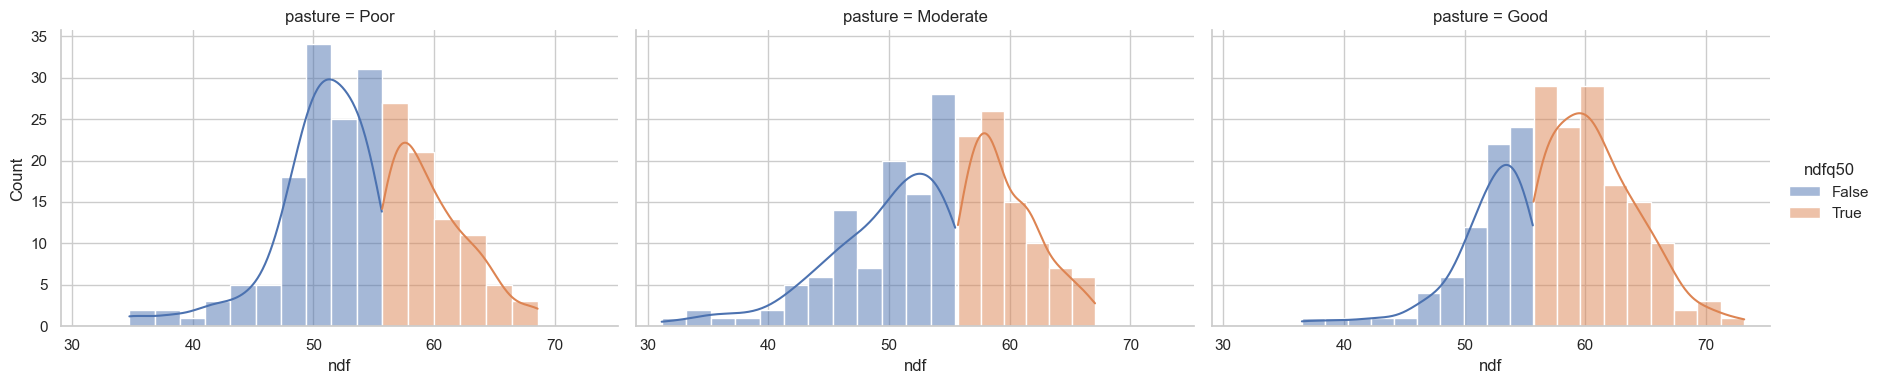

In [14]:
g = sns.FacetGrid(data_long,
    col="pasture", col_order=order_pasture, hue="ndfq50",
    **params_facet)
g.map(sns.lineplot, "wv", "value", marker="o")
g.add_legend()
g = sns.FacetGrid(data,
    col="pasture", col_order=order_pasture, 
    hue="ndfq50", **params_facet)
g.map(sns.histplot, "ndf", **params_hist)
g.add_legend()

In [ ]:
# summarize, groupby pasture and ndf_bin for counts, mean, median, std
data_grouped = data.groupby(["pasture", "ndfq50"]).agg(
    count=("id", "count"),
    mean=("ndf", "mean"),
    median=("ndf", "median"),
    std=("ndf", "std")
).reset_index()
data_grouped

,pasture,ndfq50,count,mean,median,std
0,Good,False,73,51.793299,52.589351,3.685448
1,Good,True,130,60.856412,60.224002,3.720219
2,Moderate,False,103,49.430771,50.593982,5.102893
3,Moderate,True,87,59.716062,59.024150,2.910514
4,Poor,False,126,50.432548,51.009410,4.066563
5,Poor,True,80,59.795855,58.820867,3.258701
